### Introduction


This notebook is dedicated to conducting Exploratory Data Analysis (EDA) and building a Predictive Machine Learning Model for the purpose of fraud detection. The significance of fraud detection spans across various industries, including banking and finance, insurance, law enforcement, government agencies, and more.

In recent times, there has been a substantial surge in fraudulent attempts, rendering fraud detection not only crucial but also a challenging task. Despite extensive efforts and human oversight, substantial financial losses are incurred due to fraudulent activities. Fraud can manifest through diverse methods such as stolen credit cards, deceptive accounting practices, phishing emails, and more. Detecting fraud becomes particularly challenging in large populations with relatively small instances.

The intersection of data mining and machine learning plays a pivotal role in anticipating and swiftly identifying fraudulent activities, enabling prompt actions to mitigate costs. Leveraging data mining tools allows for the examination of a vast number of transactions, unveiling patterns that facilitate the identification of fraudulent transactions.

In [32]:
import pandas as pd
import numpy as np
##Read file
df= pd.read_csv('Fraud.csv')

In [33]:
df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0.0,0.0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0.0,0.0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1.0,0.0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1.0,0.0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
97220,10,PAYMENT,17011.46,C1283088834,0.0,0.00,M485693121,0.0,0.0,0.0,0.0
97221,10,PAYMENT,1680.50,C671281,0.0,0.00,M661110294,0.0,0.0,0.0,0.0
97222,10,PAYMENT,26450.83,C948744009,0.0,0.00,M1020130183,0.0,0.0,0.0,0.0
97223,10,PAYMENT,12171.47,C1843902873,0.0,0.00,M2011839805,0.0,0.0,0.0,0.0


In [34]:
##Drop rows that have any empty value
data=df.dropna()

In [35]:
data

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0.0,0.0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0.0,0.0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1.0,0.0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1.0,0.0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
97219,10,PAYMENT,10811.91,C504389296,1009.0,0.00,M1318927100,0.0,0.0,0.0,0.0
97220,10,PAYMENT,17011.46,C1283088834,0.0,0.00,M485693121,0.0,0.0,0.0,0.0
97221,10,PAYMENT,1680.50,C671281,0.0,0.00,M661110294,0.0,0.0,0.0,0.0
97222,10,PAYMENT,26450.83,C948744009,0.0,0.00,M1020130183,0.0,0.0,0.0,0.0


In [36]:
data.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,97224.000000,9.722400e+04,9.722400e+04,9.722400e+04,9.722400e+04,9.722400e+04,97224.000000,97224.0
mean,8.456801,1.724234e+05,8.793240e+05,8.956240e+05,8.792774e+05,1.182315e+06,0.001173,0.0
std,1.833483,3.419664e+05,2.689877e+06,2.727838e+06,2.403365e+06,2.802840e+06,0.034223,0.0
min,1.000000,3.200000e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.0
25%,8.000000,9.893135e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.0
50%,9.000000,5.208212e+04,1.994750e+04,0.000000e+00,2.080950e+04,4.894480e+04,0.000000,0.0
75%,10.000000,2.103614e+05,1.863529e+05,2.107077e+05,5.853541e+05,1.051531e+06,0.000000,0.0
max,10.000000,1.000000e+07,3.379739e+07,3.400874e+07,3.400874e+07,3.397234e+07,1.000000,0.0


In [37]:
#Categorical Columns
obj_cols=data.select_dtypes(include=['object'])
obj_cols

,type,nameOrig,nameDest
0,PAYMENT,C1231006815,M1979787155
1,PAYMENT,C1666544295,M2044282225
2,TRANSFER,C1305486145,C553264065
3,CASH_OUT,C840083671,C38997010
4,PAYMENT,C2048537720,M1230701703
...,...,...,...
97219,PAYMENT,C504389296,M1318927100
97220,PAYMENT,C1283088834,M485693121
97221,PAYMENT,C671281,M661110294
97222,PAYMENT,C948744009,M1020130183


In [38]:
#Integer value columns
int_cols=data.select_dtypes(include=['int'])
int_cols

,step
0,1
1,1
2,1
3,1
4,1
...,...
97219,10
97220,10
97221,10
97222,10


In [39]:
#Float value columns
float_cols=data.select_dtypes(include=['float'])
float_cols

,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,9839.64,170136.0,160296.36,0.0,0.0,0.0,0.0
1,1864.28,21249.0,19384.72,0.0,0.0,0.0,0.0
2,181.00,181.0,0.00,0.0,0.0,1.0,0.0
3,181.00,181.0,0.00,21182.0,0.0,1.0,0.0
4,11668.14,41554.0,29885.86,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...
97219,10811.91,1009.0,0.00,0.0,0.0,0.0,0.0
97220,17011.46,0.0,0.00,0.0,0.0,0.0,0.0
97221,1680.50,0.0,0.00,0.0,0.0,0.0,0.0
97222,26450.83,0.0,0.00,0.0,0.0,0.0,0.0


The provided data has the financial transaction data as well as the target variable isFraud, which is the actual fraud status of the transaction and isFlaggedFraud is the indicator which the simulation is used to flag the transaction using some threshold value.

In [40]:
#Boolean value columns, we don't have such column here still it is good practice to understand if any column needs data conversion
bool_cols=data.select_dtypes(include=['bool'])
bool_cols

""
0
1
2
3
4
...
97219
97220
97221
97222


In [41]:
## Count of fraud transactions in dataset (for own knowledge, not a necessary step)
## isFraud is the target column

data['isFraud'].value_counts()

0.0    97110
1.0      114
Name: isFraud, dtype: int64

In [42]:
data['isFlaggedFraud'].value_counts()

0.0    97224
Name: isFlaggedFraud, dtype: int64

### Data Analysis


<Axes: xlabel='type', ylabel='count'>

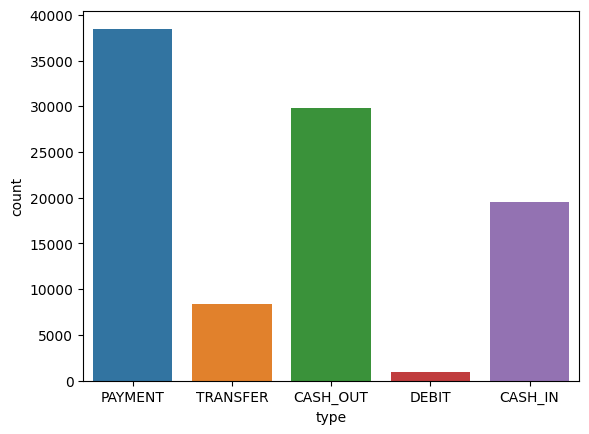

In [43]:
## Count of transaction types (type field)
import matplotlib as plt
import seaborn as sns

sns.countplot(x='type',data=data)


<Axes: xlabel='type', ylabel='amount'>

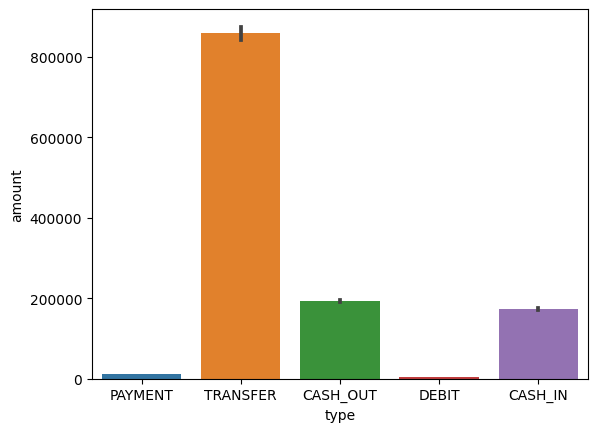

In [44]:
## transaction type and respective net transaction amount (type field)
import matplotlib as plt
import seaborn as sns

sns.barplot(x='type',y='amount',data=data)

<Axes: xlabel='type', ylabel='isFraud'>

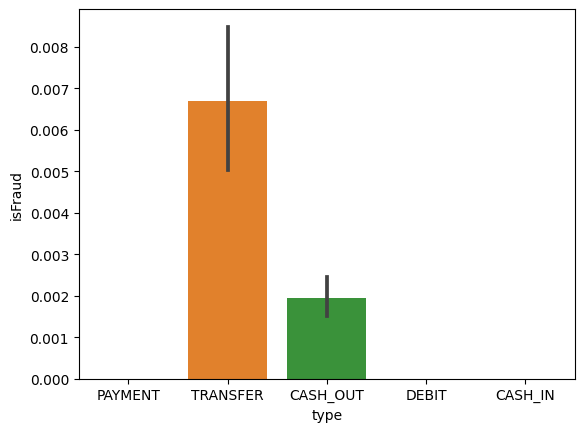

In [45]:
## transaction type and respective fraud counts (type field)
import matplotlib.pyplot as plt
import seaborn as sns

sns.barplot(x='type',y='isFraud',data=data)

The graph above shows that **TRANSFER** and **CASH_OUT** are two most used mode of transaction and we can see that **TRANSFER** and **CASH_OUT** are also the only way in which fraud happen. Thus we will focus on this type of transactions.

<ipython-input-46-67f1a4e727f0>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(),


<Axes: >

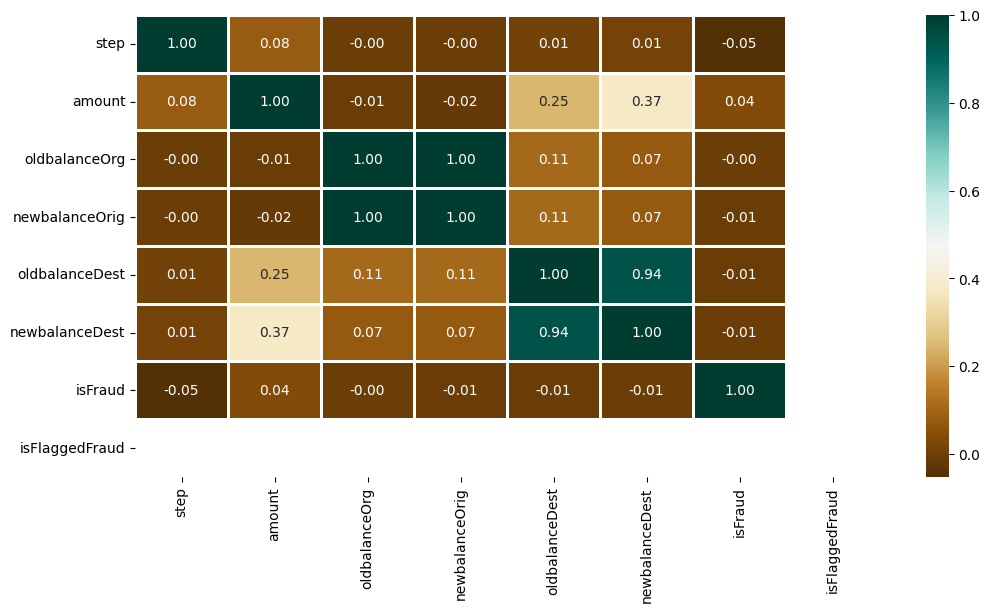

In [46]:
## correlation between fields
plt.figure(figsize=(12, 6))
sns.heatmap(data.corr(),
            cmap='BrBG',
            fmt='.2f',
            linewidths=2,
            annot=True)

1.    **High** **Correlations:**

  OldbalanceOrg and NewbalanceOrg are highly correlated.
Similarly, strong correlation exists between OldbalanceDest and NewbalanceDest.
2.   **Target Variable Correlation:**

  Amount correlates with the target variable isFraud.

3.     **Limited Inter-feature Relations:**

  Overall, there's no significant correlation between features, suggesting relationship nuances based on transaction types and amounts.

To dive deeper, separate heatmaps for fraud and non-fraud transactions are recommended for a more detailed understanding of feature relationships.

In [47]:
fraud = data.loc[data.isFraud == 1]
nonfraud = data.loc[data.isFraud == 0]
fraudcount = fraud.isFraud.count()
nonfraudcount = nonfraud.isFraud.count()

<ipython-input-48-8aa7fa3657d1>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(fraud.corr(),cmap='RdBu',);


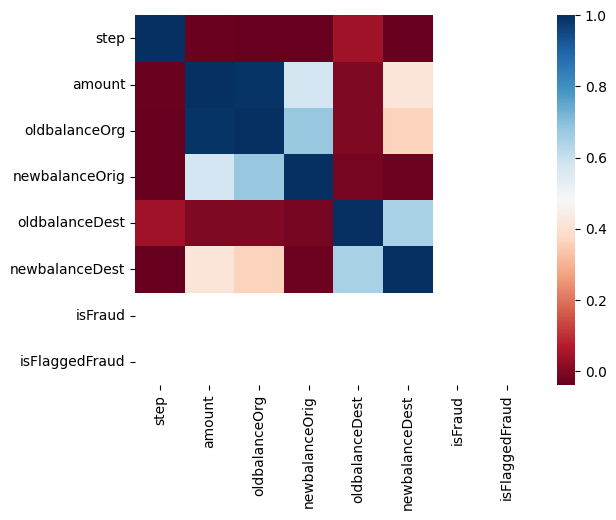

In [48]:
sns.heatmap(fraud.corr(),cmap='RdBu',);

There are 2 flags which stand out to me and it's interesting to look onto: isFraud and isFlaggedFraud column. From the hypothesis, isFraud is the indicator which indicates the actual fraud transactions whereas isFlaggedFraud is what the system prevents the transaction due to some thresholds being triggered. From the above heatmap we can see that there is some relation between other columns and isFlaggedFraud thus there must be relation between isFraud.

### Data Exploration

                   mean    min         max     median
type                                                 
CASH_OUT  523727.253793  164.0  10000000.0  39077.815
TRANSFER  561430.441429  164.0  10000000.0  34198.245


<Figure size 1000x600 with 0 Axes>

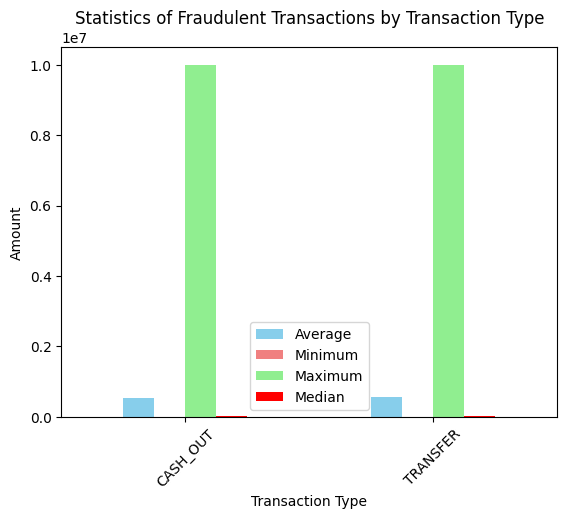

In [49]:
## Average transaction amount of fraudulent data

# fraudulent transactions
fraudulent_data = data[data['isFraud'] == 1]

# Group Data by Transaction Type
grouped_data = fraudulent_data.groupby('type')

# Calculate the Average, Minimum, and Maximum Amount
agg_data = grouped_data['amount'].agg(['mean', 'min', 'max','median'])

print(agg_data)

plt.figure(figsize=(10, 6))
agg_data.plot(kind='bar', color=['skyblue', 'lightcoral', 'lightgreen','red'])
plt.title('Statistics of Fraudulent Transactions by Transaction Type')
plt.xlabel('Transaction Type')
plt.ylabel('Amount')
plt.xticks(rotation=45)
plt.legend(['Average', 'Minimum', 'Maximum','Median'])
plt.show()

<Figure size 1200x600 with 0 Axes>

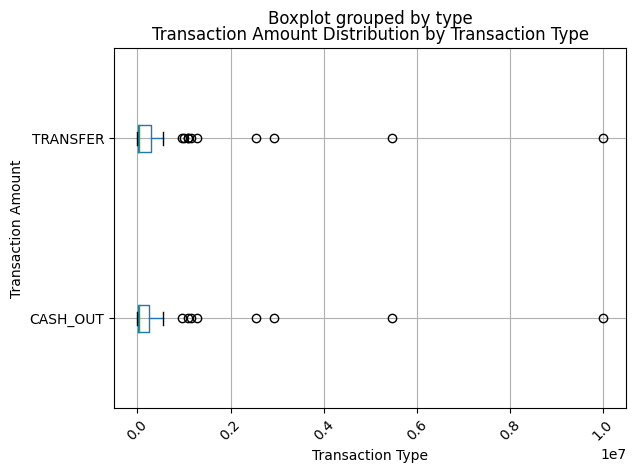

In [50]:
plt.figure(figsize=(12, 6))
fraudulent_data.boxplot(column='amount', by='type', vert=False)
plt.title('Transaction Amount Distribution by Transaction Type')
plt.xlabel('Transaction Type')
plt.ylabel('Transaction Amount')
plt.xticks(rotation=45)
plt.show()



In [51]:
## type is our required categorical data, changing it to indicator type(pivot and 0-1 values)
type_pivot = pd.get_dummies(data['type'], drop_first=True)
data_1 = pd.concat([data, type_pivot], axis=1)
data_1.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,CASH_OUT,DEBIT,PAYMENT,TRANSFER
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0.0,0.0,0,0,1,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0.0,0.0,0,0,1,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1.0,0.0,0,0,0,1
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1.0,0.0,1,0,0,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0.0,0.0,0,0,1,0


### Data Cleaning

In [52]:
## Drop unwanted fields,and dividing into features and target
x = data_1.drop(['isFraud', 'type', 'nameOrig', 'nameDest','DEBIT','PAYMENT'], axis=1)
y = data_1['isFraud']

In [53]:
x.head()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFlaggedFraud,CASH_OUT,TRANSFER
0,1,9839.64,170136.0,160296.36,0.0,0.0,0.0,0,0
1,1,1864.28,21249.0,19384.72,0.0,0.0,0.0,0,0
2,1,181.00,181.0,0.00,0.0,0.0,0.0,0,1
3,1,181.00,181.0,0.00,21182.0,0.0,0.0,1,0
4,1,11668.14,41554.0,29885.86,0.0,0.0,0.0,0,0


Machine Learning Models

In [54]:
# splitting the data
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# split the train and test dataset (80:20)
x_train, x_test,y_train, y_test = train_test_split(x, y,test_size=0.20,random_state=100)



In [55]:
## Logistic regression
from sklearn.linear_model import LogisticRegression

LogisReg = LogisticRegression(random_state=0)
LogisReg.fit(x_train, y_train)

# Prediction
y_pred = LogisReg.predict(x_test)

acc = accuracy_score(y_test, y_pred)
print("Logistic Regression model accuracy (in %):", acc*100)

Logistic Regression model accuracy (in %): 99.89200308562613


In [56]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     19418
         1.0       1.00      0.22      0.36        27

    accuracy                           1.00     19445
   macro avg       1.00      0.61      0.68     19445
weighted avg       1.00      1.00      1.00     19445



In [57]:
#svm model
from sklearn import svm

#Create a svm Classifier
SVM_model = svm.SVC(kernel='rbf')

#Train the model using the training sets
SVM_model.fit(x_train, y_train)

#Predict the response for test dataset
y_pred = SVM_model.predict(x_test)

acc = accuracy_score(y_test, y_pred)
print("SVM model accuracy (in %):", acc*100)

SVM model accuracy (in %): 99.86114682437645


In [58]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     19418
         1.0       0.00      0.00      0.00        27

    accuracy                           1.00     19445
   macro avg       0.50      0.50      0.50     19445
weighted avg       1.00      1.00      1.00     19445



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


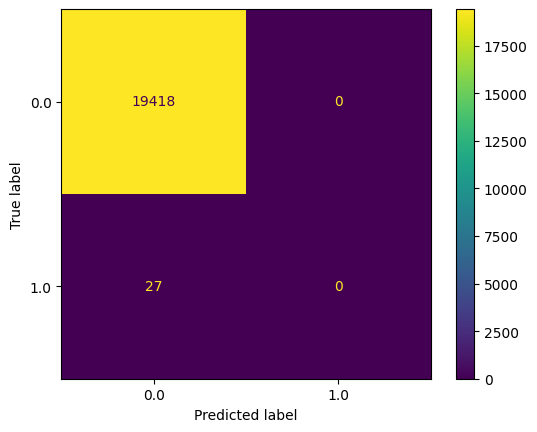

In [62]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred, labels=SVM_model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=SVM_model.classes_)
disp.plot()

plt.show()

###Conclusion

* Existing rule-based systems fall short in detecting all fraud transactions.

* Machine learning emerges as a viable solution for fraud detection.
Effectiveness of Predictive Models:

* Predictive models, specifically, demonstrate high precision scores, showcasing their capability in accurately detecting fraud transactions.


* SVM provided better results, we can proceed with that.